# Prepare Data

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path="/content/drive/My Drive/praktikum-ml/winequality-red.csv"

Mounted at /content/drive


# Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from scipy.stats import shapiro
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from sklearn.metrics import f1_score

# EDA

In [3]:
df=pd.read_csv(path)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


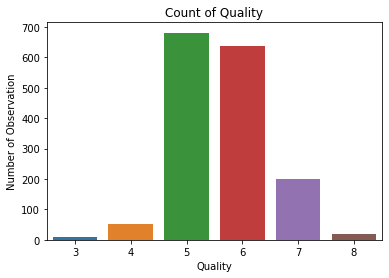

In [4]:
sns.countplot('quality',data=df)
plt.title('Count of Quality')
plt.xlabel('Quality')
plt.ylabel('Number of Observation')
plt.show()

In [5]:
df["quality"].value_counts() 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [6]:
cor_mat= df.corr()

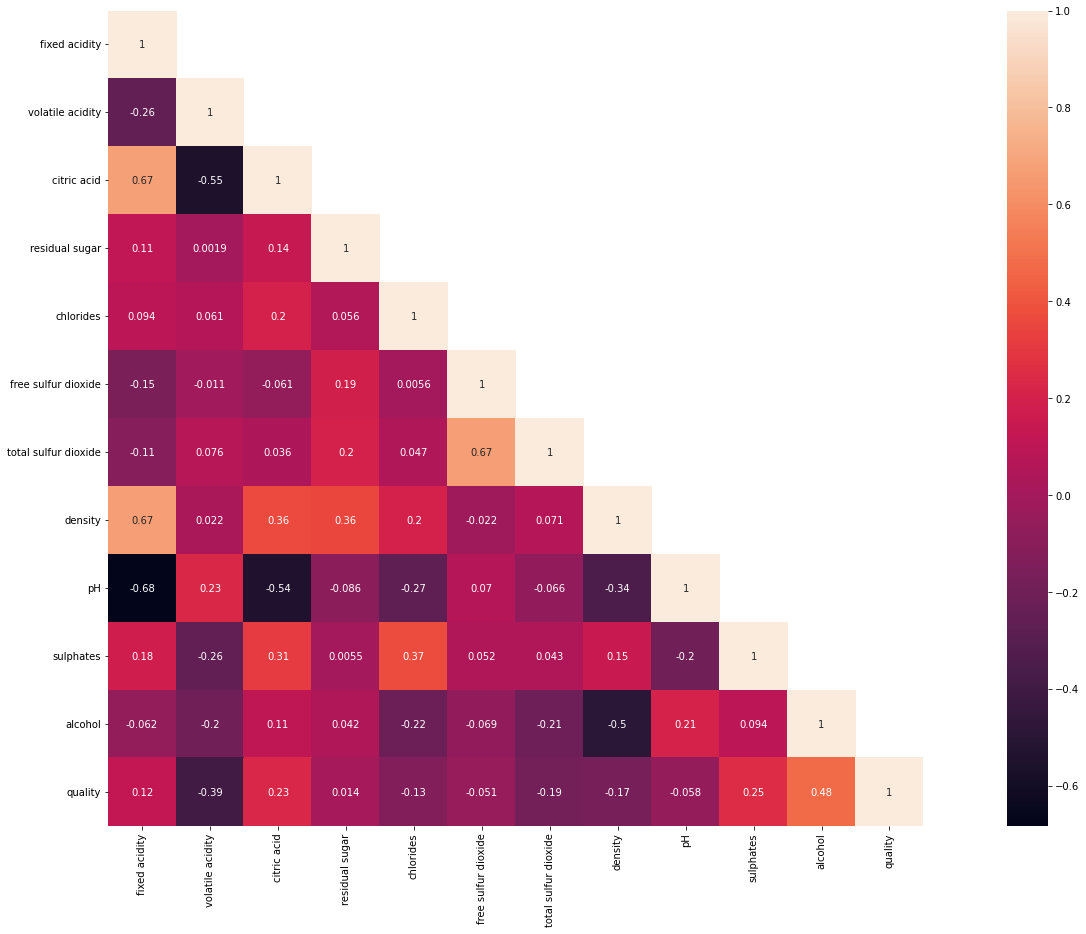

In [7]:
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30, 15)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

# Null Data

In [8]:
null_data=df.isna().sum()
null_data

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Unique Data

In [9]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

# Describe Data

In [10]:
vectorizer=CountVectorizer(lowercase=False)
vectorizer.fit_transform(df)
feat_dict=vectorizer.vocabulary_.keys()
feat_dict

dict_keys(['fixed', 'acidity', 'volatile', 'citric', 'acid', 'residual', 'sugar', 'chlorides', 'free', 'sulfur', 'dioxide', 'total', 'density', 'pH', 'sulphates', 'alcohol', 'quality'])

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Feature Selection

In [12]:
X = df.drop(columns='quality')
y = df.quality

In [13]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [14]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

# Train Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# Decision Tree

## Gini Model

In [31]:
gini_model = DecisionTreeClassifier()

In [32]:
gini_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
y_pred = gini_model.predict(X_test)

In [28]:
c=confusion_matrix(y_test,y_pred)
a=accuracy_score(y_test,y_pred)
p=precision_score(y_test,y_pred,average='micro')
r=recall_score(y_test,y_pred,average='micro')
f1=f1_score(y_test, y_pred,average='micro')

print("accuracy",a)
print("precision",p)
print("recall",r)
print("f1 score",f1)

accuracy 0.56875
precision 0.56875
recall 0.56875
f1 score 0.56875


In [35]:
print('Training set score: {:.4f}'.format(gini_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gini_model.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.5719


## Entropy

In [36]:
entropy_model = DecisionTreeClassifier(criterion='entropy')

In [38]:
y_pred = entropy_model.fit(X_train,y_train)

In [41]:
print('Training set score: {:.4f}'.format(gini_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gini_model.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.5719


These models are overfitting.

## Pruning

In [44]:
path = gini_model.cost_complexity_pruning_path(X,y)
path

{'ccp_alphas': array([0.        , 0.00040303, 0.00040921, 0.00054722, 0.0005559 ,
        0.0005559 , 0.0005559 , 0.0005559 , 0.0005559 , 0.00056285,
        0.00057327, 0.00057327, 0.00057602, 0.00057728, 0.00058072,
        0.00058275, 0.0005863 , 0.00058761, 0.0005886 , 0.00058891,
        0.00059412, 0.00059933, 0.00060223, 0.00060893, 0.00061236,
        0.00061288, 0.00061381, 0.00062539, 0.00062539, 0.00062539,
        0.00062539, 0.00062539, 0.00062539, 0.00062539, 0.00062539,
        0.00062539, 0.00062539, 0.00062539, 0.00062539, 0.00062539,
        0.00062539, 0.00062539, 0.00062539, 0.00062539, 0.00062539,
        0.00078174, 0.0007976 , 0.00081301, 0.00083385, 0.00083385,
        0.00083385, 0.00083385, 0.00083385, 0.00083385, 0.00083385,
        0.00083385, 0.00083385, 0.00083385, 0.00083385, 0.00083385,
        0.00083385, 0.00086814, 0.00087555, 0.00087632, 0.00088944,
        0.00088944, 0.00091492, 0.00092606, 0.00093809, 0.00093809,
        0.00093809, 0.00093809, 0.

In [45]:
ccp_alpha = path.ccp_alphas

In [47]:
dt_model= [] 
for ccp in ccp_alpha :
    dt_m = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(X, y)
    dt_model.append(dt_m)

In [52]:
train_score = [i.score(X,y) for i in dt_model]
train_score

[1.0,
 0.9993746091307066,
 0.9987492182614134,
 0.99812382739212,
 0.9956222639149468,
 0.9949968730456535,
 0.9943714821763602,
 0.9949968730456535,
 0.9943714821763602,
 0.9943714821763602,
 0.9931207004377736,
 0.9937460913070669,
 0.9924953095684803,
 0.9912445278298937,
 0.9906191369606003,
 0.9887429643527205,
 0.9893683552220137,
 0.9881175734834271,
 0.9868667917448405,
 0.9862414008755472,
 0.9856160100062539,
 0.983739837398374,
 0.9831144465290806,
 0.983739837398374,
 0.9812382739212008,
 0.981863664790494,
 0.9806128830519074,
 0.9681050656660413,
 0.9662288930581614,
 0.9668542839274546,
 0.967479674796748,
 0.9681050656660413,
 0.9668542839274546,
 0.9668542839274546,
 0.9668542839274546,
 0.9681050656660413,
 0.9681050656660413,
 0.967479674796748,
 0.9687304565353346,
 0.9681050656660413,
 0.9668542839274546,
 0.9681050656660413,
 0.9681050656660413,
 0.967479674796748,
 0.9681050656660413,
 0.9649781113195748,
 0.9643527204502814,
 0.9637273295809882,
 0.956222639149

In [53]:
test_score = [i.score(X_test,y_test) for i in dt_model]
test_score

[1.0,
 1.0,
 1.0,
 1.0,
 0.99375,
 0.990625,
 0.990625,
 0.9875,
 0.9875,
 0.99375,
 0.99375,
 0.990625,
 0.9875,
 0.9875,
 0.9875,
 0.98125,
 0.984375,
 0.98125,
 0.978125,
 0.984375,
 0.984375,
 0.978125,
 0.975,
 0.978125,
 0.971875,
 0.975,
 0.971875,
 0.975,
 0.96875,
 0.975,
 0.975,
 0.975,
 0.96875,
 0.975,
 0.975,
 0.978125,
 0.971875,
 0.971875,
 0.975,
 0.978125,
 0.971875,
 0.975,
 0.971875,
 0.975,
 0.971875,
 0.96875,
 0.965625,
 0.96875,
 0.953125,
 0.95625,
 0.953125,
 0.959375,
 0.95625,
 0.953125,
 0.95,
 0.95625,
 0.953125,
 0.959375,
 0.953125,
 0.953125,
 0.95625,
 0.953125,
 0.953125,
 0.95,
 0.94375,
 0.946875,
 0.94375,
 0.946875,
 0.928125,
 0.925,
 0.921875,
 0.925,
 0.928125,
 0.93125,
 0.93125,
 0.93125,
 0.93125,
 0.925,
 0.928125,
 0.93125,
 0.928125,
 0.93125,
 0.93125,
 0.925,
 0.928125,
 0.921875,
 0.921875,
 0.9125,
 0.91875,
 0.915625,
 0.909375,
 0.915625,
 0.91875,
 0.9125,
 0.915625,
 0.9125,
 0.909375,
 0.915625,
 0.909375,
 0.90625,
 0.90625,
 0.9

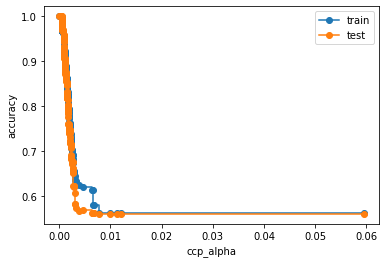

In [54]:
fix ,ax = plt.subplots()
ax.set_xlabel("ccp_alpha")
ax.set_ylabel("accuracy")
ax.plot(ccp_alpha,train_score,marker = 'o',label = 'train',drawstyle = 'steps-post')
ax.plot(ccp_alpha,test_score,marker = 'o',label = 'test',drawstyle = 'steps-post')
ax.legend()
plt.show()

In [58]:
cpp_model = DecisionTreeClassifier(random_state=42,ccp_alpha=0.02)

In [59]:
y_pred = cpp_model.fit(X_train,y_train)

In [60]:
print('Training set score: {:.4f}'.format(cpp_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(cpp_model.score(X_test, y_test)))

Training set score: 0.5590
Test set score: 0.5312


# Hyperparameter Tuning

In [55]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(2,30))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

In [62]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(cpp_model, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 6384 candidates, totalling 31920 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'}


# New Model After Hyperparameter Tuning

In [63]:
new_cpp_model = DecisionTreeClassifier(criterion='entropy',max_depth=15,min_samples_leaf=1,min_samples_split=3,splitter='random')

In [65]:
y_pred = new_cpp_model.fit(X_train,y_train)

In [66]:
print('Training set score: {:.4f}'.format(cpp_model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(cpp_model.score(X_test, y_test)))

Training set score: 0.5590
Test set score: 0.5312


[Text(0.5, 0.75, 'X[10] <= 10.525\ngini = 0.642\nsamples = 1279\nvalue = [9, 43, 551, 506, 157, 13]'),
 Text(0.25, 0.25, 'gini = 0.541\nsamples = 786\nvalue = [6, 27, 465, 256, 30, 2]'),
 Text(0.75, 0.25, 'gini = 0.644\nsamples = 493\nvalue = [3, 16, 86, 250, 127, 11]')]

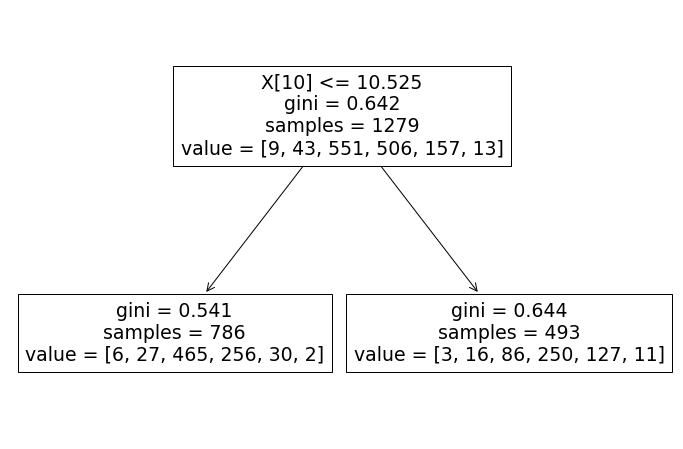

In [67]:
plt.figure(figsize=(12,8))
tree.plot_tree(cpp_model.fit(X_train, y_train))